In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import pickle

In [7]:
df = pd.read_csv('Dataset/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Checking for Multicollinearity
X = df[['TV', 'Radio', 'Newspaper']] 
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

     Feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
X = df.drop(columns = 'Sales')
Y = df['Sales']

In [14]:
# Normalization
scaler = StandardScaler()

In [15]:
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [17]:
# Split the dataset
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.2,random_state = 20)

In [18]:
X_train

array([[ 5.90353742e-01,  2.43084817e-03, -7.52804279e-01],
       [-9.04082253e-02, -5.91776482e-01, -9.36931533e-01],
       [ 8.49580427e-01,  6.91171163e-01,  6.69578760e-01],
       [ 7.43320840e-01,  4.21076922e-01, -9.78360166e-01],
       [-5.17781948e-01,  4.27829278e-01, -1.01978880e+00],
       [ 1.24659427e+00, -1.32616272e-01, -2.55016247e-02],
       [ 8.79940308e-01, -1.34128800e+00, -8.03439274e-01],
       [ 8.98623313e-01, -1.40881156e+00, -6.88359740e-01],
       [ 1.10530405e+00,  9.95027184e-01, -3.38517957e-01],
       [-1.70882347e+00,  1.10306488e+00, -1.00597925e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-1.02105537e+00, -7.60585383e-01,  5.77515133e-01],
       [-5.44638766e-01, -9.22641928e-01, -1.24074150e+00],
       [ 2.83251860e-01,  1.10981724e+00,  3.28943340e-01],
       [-6.85928986e-01,  1.50982681e-01,  1.97227908e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [ 6.05533683e-01,  1.76479577e+00

In [19]:
X_test

array([[ 1.56070228, -0.63229062,  0.29672107],
       [ 1.18820988,  0.25902038, -0.3523275 ],
       [-0.57850171, -1.05768905, -1.07502697],
       [ 1.51399477, -1.41556392, -0.31550205],
       [ 1.26527727,  0.24551567, -1.15328106],
       [ 0.79820216,  0.02268792,  1.24497643],
       [ 0.27040729, -1.04418434,  0.21386381],
       [-0.61703541, -1.24000266, -1.03359834],
       [ 1.08428567,  1.23135965, -0.55486748],
       [-1.27094056, -1.32103093, -0.771217  ],
       [-1.41806922,  1.06255074, -0.97836017],
       [-0.30993353,  0.35355336, -0.75280428],
       [ 0.51445404,  0.36705807, -0.56867702],
       [-1.50798117,  0.96801776, -0.41216886],
       [ 0.7760161 ,  1.33264499,  0.14941927],
       [ 1.51633014,  1.73103399,  0.51767378],
       [-1.66912209, -0.78759481, -1.14407469],
       [ 0.69778102, -1.21974559, -0.51343885],
       [-1.49747198, -0.10560685,  0.91354737],
       [-1.51615499, -1.29402151,  0.04814928],
       [ 1.18353913,  0.46834341, -0.472

In [20]:
# Model Building
model = LinearRegression()

In [21]:
# Fitting the model
model.fit(X_train,Y_train)

LinearRegression()

In [22]:
print("Intercept ",model.intercept_)
print("Coefficient ",model.coef_)

Intercept  15.095753637430883
Coefficient  [4.58062237 1.56147747 0.09227506]


In [48]:
model.predict(scaler.transform([[120,100,50]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([21.82269676])

In [28]:
# Predict on test data
Y_pred = model.predict(X_test)

# Compare actual vs predicted
results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(results.head())

     Actual  Predicted
150    16.1  21.284814
28     18.9  20.910438
13     13.7  10.695100
178    16.8  19.791308
109    19.8  21.168459


In [32]:
r2 = r2_score(Y_test, Y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.89


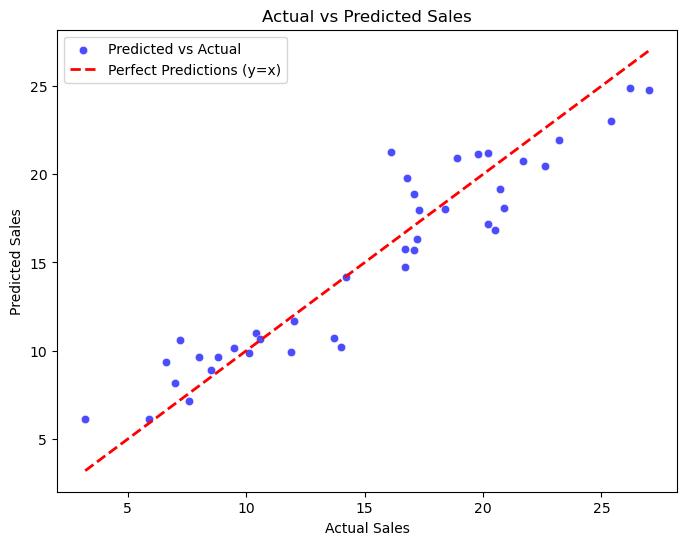

In [43]:
# Scatter plot: Actual vs Predicted Sales
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.7, color='blue', label="Predicted vs Actual")

# Plot the ideal perfect predictions line (y = x)
line = np.linspace(min(Y_test), max(Y_test), 100)
plt.plot(line, line, color='red', linestyle='dashed', linewidth=2, label="Perfect Predictions (y=x)")

# Labels and title
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()

# Show plot
plt.show()

In [45]:
# Save the trained model to a file
with open("sales_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully as 'sales_model.pkl'")

Model saved successfully as 'sales_model.pkl'


In [47]:
# Save the scaler used for both X and Y
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Scaler saved successfully as scaler.pkl")

✅ Scaler saved successfully as scaler.pkl
